# MWL's attempt to use redrock version 0.8.1, and minor fixes
## Kludges put to some redrock modules to make syntax consistent

In [2]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import redrock.targets as tgs
import astropy.units as u
import redrock.templates as rrtpl
from linetools.spectra.xspectrum1d import XSpectrum1D
from elg_cgm import elgUtils as elg
from linetools.spectra.utils import rebin
from astropy.io import fits
from astropy.table import Table
from desisim.pixelsplines import gauss_blur_matrix as gbm

## J2223+0137

### Rebinning and creating redrock object

In [54]:
# Read file
specFile = '../Redux/2017Jul14/Science/J2223+0137.hdf5'
specTable = Table.read(specFile)

#Get the coadded spectrum
galFlux = specTable['flux'][0]  ## Greg: Why divide flux by u.AA?
galSig = specTable['sig'][0]  ## Greg: I suspect the error array is 1-sigma, not variance
galWav = specTable['wave'][0]

np.where(galSig <= 0.)[0]

array([   0,  518,  519, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119,
       2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130,
       2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141,
       2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152,
       2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163,
       2164, 2697, 2698, 2724])

In [56]:
gd = range(520,2112)
galFlux_cut = galFlux[gd]
galSig_cut = galSig[gd]
galWav_cut = galWav[gd]

#Restrict to a well-fluxed wavelength range
gd = np.where(galWav_cut <= 7000.)[0]
galFlux_cut = galFlux_cut[gd]
galSig_cut = galSig_cut[gd]
galWav_cut = galWav_cut[gd]

#Create Xspectrum1D object
spec = XSpectrum1D.from_tuple((galWav_cut,galFlux_cut,galSig_cut),verbose=False)

#Rebin to constant velocity bins
newSpec = elg.rebin2ConstVel(spec,do_sig=True,grow_bad_sig=True)

#Create resolution matrix  
pixbound = np.append(newSpec.wavelength.value,spec.wvmax.value)
sig_conv = newSpec.sig.value
R = gbm(pixbound,sig_conv)

# Create redrock spectrum object and target object
rrSpecObj = tgs.Spectrum(newSpec.wavelength.value,newSpec.flux.value,1/newSpec.sig.value**2,
                         R.todia(),R)
rrTargObj = tgs.Target('J2223+0137',[rrSpecObj])

#Get galaxy template
galTemp = rrtpl.Template(filename=rrtpl.find_templates()[0])

DEBUG: Using default redshift range 0.0050-1.6988 for rrtemplate-galaxy.fits


### Finding redshifts

In [57]:
galTemp._redshifts = np.linspace(start=0.3,stop=0.5,num=1000)

In [58]:
from redrock.zfind import zfind
distTarg = tgs.DistTargetsCopy([rrTargObj])
dwave = distTarg.wavegrids()
distTemp = rrtpl.DistTemplate(galTemp,dwave)
zscan,zfit = zfind(distTarg,[distTemp])

Computing redshifts
  Scanning redshifts for template GALAXY
    Progress:   0 %
    Progress:  10 %
    Finished in: 0.5 seconds
  Finding best fits for template GALAXY
    Finished in: 0.2 seconds


In [59]:
zfit

chi2,coeff [10],z,zerr,zwarn,zz [15],zzchi2 [15],npixels,spectype,subtype,ncoeff,targetid,znum,deltachi2
float64,float64,float64,float64,int64,float64,float64,int64,str6,str1,int64,str10,int64,float64
1757.59870252,199.514802151 .. -42.4816546759,0.369923407226,0.000127480814484,0,0.36966966967 .. 0.37007007007,1762.1836676 .. 1758.63854293,1275,GALAXY,,10,J2223+0137,0,111.526558552
1869.12526107,-2799.31050742 .. -222.895618824,0.34021398197,3.98209253866e-05,0,0.34004004004 .. 0.34044044044,1879.40595316 .. 1917.08619358,1275,GALAXY,,10,J2223+0137,1,26.7553622276
1895.8806233,-5635.00883818 .. 134.110957491,0.300322410499,3.12003958941e-05,0,0.3002002002 .. 0.300600600601,1910.23381853 .. 1911.34197083,1275,GALAXY,,10,J2223+0137,2,0.0


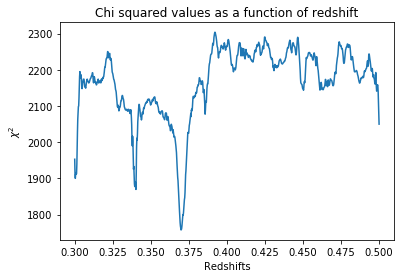

In [60]:
%matplotlib inline
plt.plot(zscan['J2223+0137']['GALAXY']['redshifts'],zscan['J2223+0137']['GALAXY']['zchi2'])
plt.xlabel('Redshifts')
plt.ylabel('$\chi^2$')
plt.title('Chi squared values as a function of redshift')

<IPython.core.display.Javascript object>


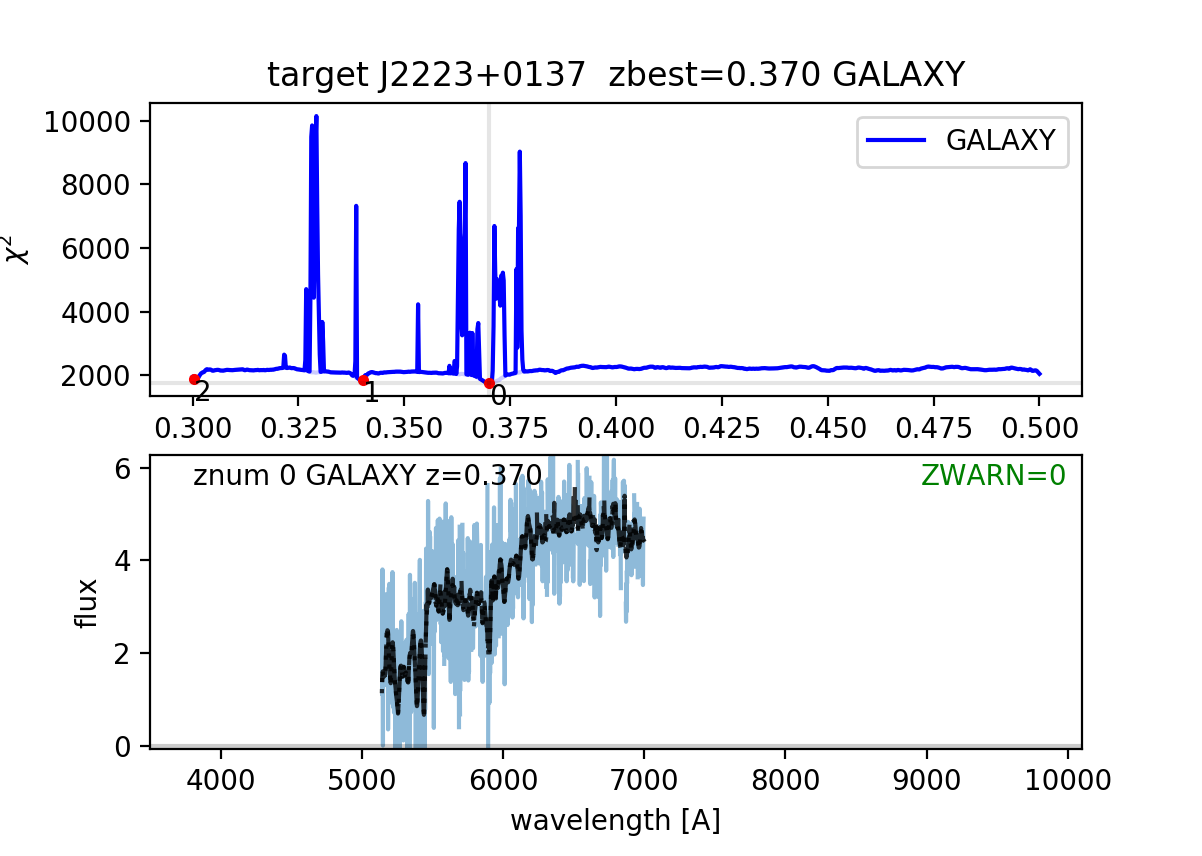

-------------------------------------------------------------------------
Select window then use keyboard shortcuts to navigate:
    up/down arrow: previous/next target
    left/right arrow: previous/next redshift fit for this target
    (d)etails
-------------------------------------------------------------------------
target 0 id J2223+0137 znum 0 GALAXY z=0.370


In [61]:
%matplotlib notebook
from redrock.plotspec import PlotSpec as ps
intPlots = ps([rrTargObj],[galTemp],zscan,zfit)

In [15]:
# Smoothed by two pixels
# Read file
specFile = '../Redux/2017Jul14/Science/J2223+0137_nbox4.hdf5'
specTable = Table.read(specFile)

#Get the coadded spectrum
galFlux = specTable['flux'][0]  ## Greg: Why divide flux by u.AA?
galSig = specTable['sig'][0]  ## Greg: I suspect the error array is 1-sigma, not variance
galWav = specTable['wave'][0]

np.where(galSig <= 0.)[0]

array([2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491,
       2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502,
       2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513,
       2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524,
       2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535,
       2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546,
       2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557,
       2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565, 2566, 2567, 2568,
       2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579,
       2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590,
       2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601,
       2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609])

In [16]:
gd = range(520,2112)
galFlux_cut = galFlux[gd]
galSig_cut = galSig[gd]
galWav_cut = galWav[gd]

#Restrict to a well-fluxed wavelength range
gd = np.where(galWav_cut <= 7000.)[0]
galFlux_cut = galFlux_cut[gd]
galSig_cut = galSig_cut[gd]
galWav_cut = galWav_cut[gd]

#Create Xspectrum1D object
spec = XSpectrum1D.from_tuple((galWav_cut,galFlux_cut,galSig_cut),verbose=False)

#Rebin to constant velocity bins
newSpec = elg.rebin2ConstVel(spec,do_sig=True,grow_bad_sig=True)

#Create resolution matrix  
pixbound = np.append(newSpec.wavelength.value,spec.wvmax.value)
sig_conv = newSpec.sig.value
R = gbm(pixbound,sig_conv)

# Create redrock spectrum object and target object
rrSpecObj = tgs.Spectrum(newSpec.wavelength.value,newSpec.flux.value,1/newSpec.sig.value**2,
                         R.todia(),R)
rrTargObj = tgs.Target('J2223+0137',[rrSpecObj])

#Get galaxy template
galTemp = rrtpl.Template(filename=rrtpl.find_templates()[0])

DEBUG: Using default redshift range 0.0050-1.6988 for rrtemplate-galaxy.fits


In [17]:
galTemp._redshifts = np.linspace(start=0.3,stop=0.5,num=1000)

In [18]:
from redrock.zfind import zfind
distTarg = tgs.DistTargetsCopy([rrTargObj])
dwave = distTarg.wavegrids()
distTemp = rrtpl.DistTemplate(galTemp,dwave)
zscan,zfit = zfind(distTarg,[distTemp])

Computing redshifts
  Scanning redshifts for template GALAXY
    Progress:   0 %
    Progress:  10 %
    Finished in: 0.7 seconds
  Finding best fits for template GALAXY
    Finished in: 0.9 seconds


In [19]:
zfit

chi2,coeff [10],z,zerr,zwarn,zz [15],zzchi2 [15],npixels,spectype,subtype,ncoeff,targetid,znum,deltachi2
float64,float64,float64,float64,int64,float64,float64,int64,str6,str1,int64,str10,int64,float64
1268.81057603,-3880.81931631 .. -188.098705505,0.33818247323,4.81597302387e-05,4,0.338038038038 .. 0.338438438438,1275.96141938 .. 1291.12303178,1389,GALAXY,,10,J2223+0137,0,5.84940639358
1274.65998242,-7249.16539259 .. 371.696465257,0.3,4.45682278085e-05,1060,0.3 .. 0.3002002002,1274.65998242 .. 1330.66446502,1389,GALAXY,,10,J2223+0137,1,34.9449520667
1309.60493449,645.20011194 .. -41.089769355,0.369164421852,0.00014119333881,0,0.368868868869 .. 0.369269269269,1314.34694746 .. 1310.12983411,1389,GALAXY,,10,J2223+0137,2,0.0


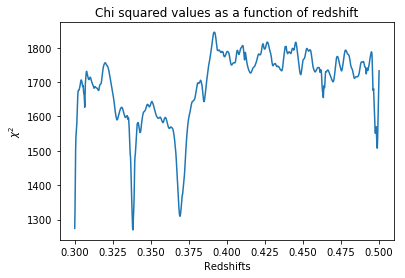

In [20]:
%matplotlib inline
plt.plot(zscan['J2223+0137']['GALAXY']['redshifts'],zscan['J2223+0137']['GALAXY']['zchi2'])
plt.xlabel('Redshifts')
plt.ylabel('$\chi^2$')
plt.title('Chi squared values as a function of redshift')

## J1620+4227

In [29]:
# Read file
specFile = 'kast/J1620+4227_coadd_new.hdf5'
specTable = Table.read(specFile)

#Get the coadded spectrum
galFlux = specTable['flux'][0]  ## Greg: Why divide flux by u.AA?
galSig = specTable['sig'][0]  ## Greg: I suspect the error array is 1-sigma, not variance
galWav = specTable['wave'][0]

np.where(galSig <= 0.)[0]

array([   0, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123,
       2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134,
       2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145,
       2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156,
       2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167,
       2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178,
       2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2704,
       2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716,
       2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724])

In [30]:
gd = range(1,2114)
#gd = range(257,879)
galFlux_cut = galFlux[gd]
galSig_cut = galSig[gd]
galWav_cut = galWav[gd]

#Restrict to a well-fluxed wavelength range
gd = np.where(galWav_cut <= 7000.)[0]
galFlux_cut = galFlux_cut[gd]
galSig_cut = galSig_cut[gd]
galWav_cut = galWav_cut[gd]

#Create Xspectrum1D object
spec = XSpectrum1D.from_tuple((galWav_cut,galFlux_cut,galSig_cut),verbose=False)

#Rebin to constant velocity bins
newSpec = elg.rebin2ConstVel(spec,do_sig=True,grow_bad_sig=True)

#Create resolution matrix  
pixbound = np.append(newSpec.wavelength.value,spec.wvmax.value)
sig_conv = newSpec.sig.value
R = gbm(pixbound,sig_conv)

# Create redrock spectrum object and target object
rrSpecObj = tgs.Spectrum(newSpec.wavelength.value,newSpec.flux.value,1/newSpec.sig.value**2,
                         R.todia(),R)
rrTargObj = tgs.Target('J1620+4227',[rrSpecObj])

#Get galaxy template
galTemp = rrtpl.Template(filename=rrtpl.find_templates()[0])

DEBUG: Using default redshift range 0.0050-1.6988 for rrtemplate-galaxy.fits


In [31]:
galTemp._redshifts = np.linspace(start=0.3,stop=0.5,num=1000)

In [32]:
from redrock.zfind import zfind
distTarg = tgs.DistTargetsCopy([rrTargObj])
dwave = distTarg.wavegrids()
distTemp = rrtpl.DistTemplate(galTemp,dwave)
zscan,zfit = zfind(distTarg,[distTemp])

Computing redshifts
  Scanning redshifts for template GALAXY
    Progress:   0 %
    Progress:  10 %
    Finished in: 0.6 seconds
  Finding best fits for template GALAXY
    Finished in: 0.2 seconds


In [33]:
zfit

chi2,coeff [10],z,zerr,zwarn,zz [15],zzchi2 [15],npixels,spectype,subtype,ncoeff,targetid,znum,deltachi2
float64,float64,float64,float64,int64,float64,float64,int64,str6,str1,int64,str10,int64,float64
2500.8332655,-768.837075981 .. 10.0167740635,0.412948842125,7.3350713119e-05,0,0.412712712713 .. 0.413113113113,2508.87765166 .. 2505.18651527,1857,GALAXY,,10,J1620+4227,0,33.8859621882
2534.71922769,-515.052439437 .. 0.10613075451,0.47206836927,7.45000733427e-05,0,0.471971971972 .. 0.472372372372,2536.22522021 .. 2541.60588053,1857,GALAXY,,10,J1620+4227,1,13.4477536604
2548.16698135,-803.880179433 .. -49.2647973269,0.435363168242,8.07958204462e-05,0,0.435135135135 .. 0.435535535536,2556.74319152 .. 2552.06166517,1857,GALAXY,,10,J1620+4227,2,0.0


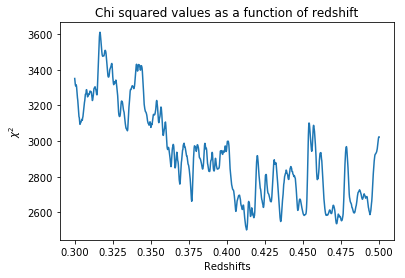

In [34]:
%matplotlib inline
plt.plot(zscan['J1620+4227']['GALAXY']['redshifts'],zscan['J1620+4227']['GALAXY']['zchi2'])
plt.xlabel('Redshifts')
plt.ylabel('$\chi^2$')
plt.title('Chi squared values as a function of redshift')

<IPython.core.display.Javascript object>


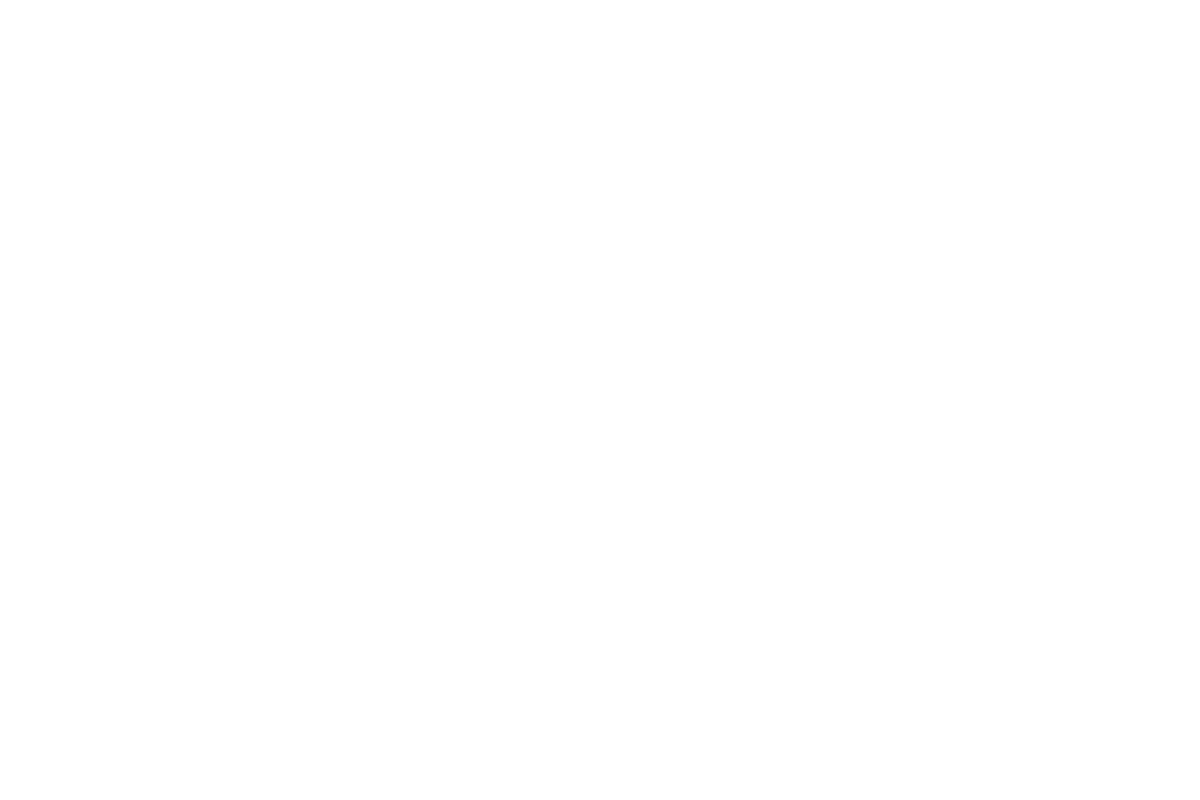

-------------------------------------------------------------------------
Select window then use keyboard shortcuts to navigate:
    up/down arrow: previous/next target
    left/right arrow: previous/next redshift fit for this target
    (d)etails
-------------------------------------------------------------------------
target 0 id J1620+4227 znum 0 GALAXY z=0.413


<IPython.core.display.Javascript object>


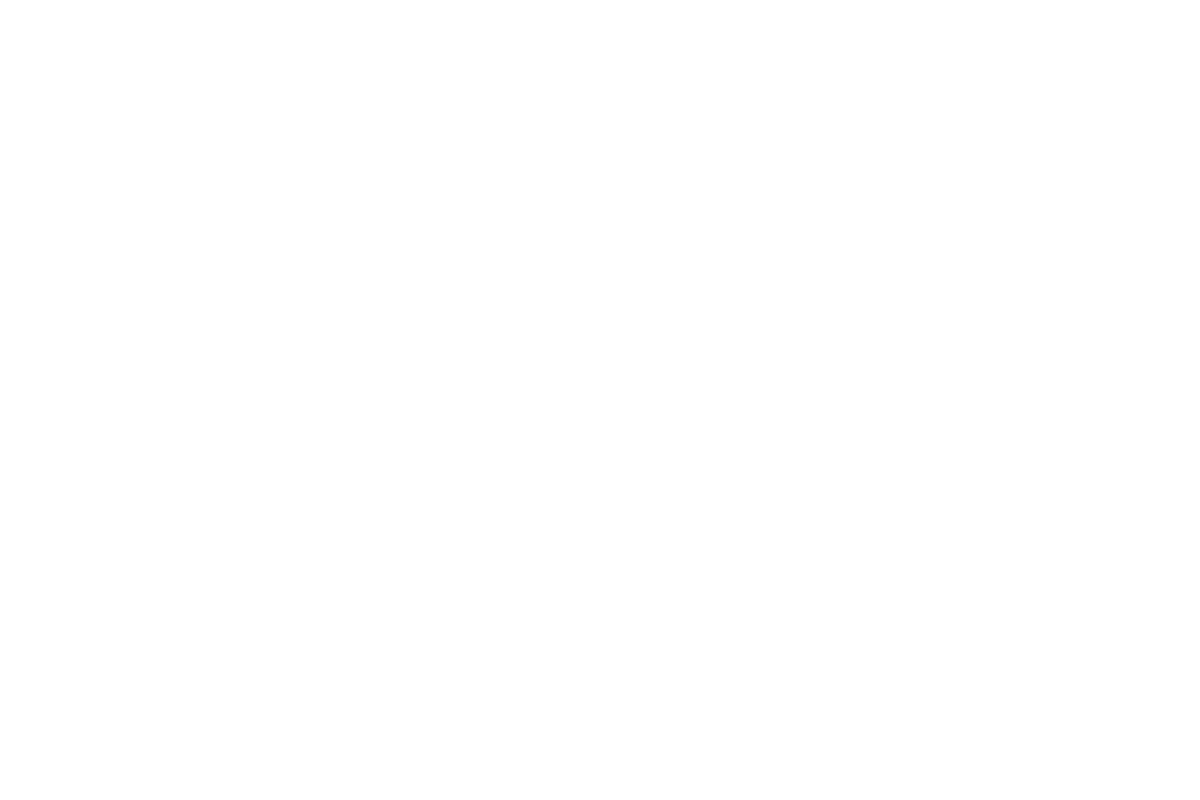

In [22]:
%matplotlib notebook
from redrock.plotspec import PlotSpec as ps
intPlots = ps([rrTargObj],[galTemp],zscan,zfit)